### import packages 📚

In [1]:
import numpy as ny
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### LOAD DATA 📂

In [2]:
path = '../input/learnplatform-covid19-impact-on-digital-learning/engagement_data/'
file_name = os.listdir(path)
for i in range(len(file_name)):
    if i == 0:
        data = pd.read_csv(path+file_name[i])
        data['district_id'] = file_name[i].split('.')[0]
    else:
        data_ = pd.read_csv(path+file_name[i])
        data_['district_id'] = file_name[i].split('.')[0]
        data = data.append(data_)

product = pd.read_csv('../input/learnplatform-covid19-impact-on-digital-learning/products_info.csv')
districts =  pd.read_csv('../input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv')

In [3]:
data.info()
product.info()
districts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22324190 entries, 0 to 41427
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   time              object 
 1   lp_id             float64
 2   pct_access        float64
 3   engagement_index  float64
 4   district_id       object 
dtypes: float64(3), object(2)
memory usage: 1021.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB
<class 'pandas

In [4]:
districts['district_id'] = districts['district_id'].astype('str')
districts['district_id'] = districts['district_id'].str.replace('\.0','') #float → str

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


### Check missing value for each data column 📜

In [5]:
data_loss = data.isna().sum().to_frame('miss').reset_index() 
product_loss = product.isna().sum().to_frame('miss').reset_index() 
districts_loss = districts.isna().sum().to_frame('miss').reset_index() 
print(data_loss[data_loss['miss'] > 0])
print(product_loss[product_loss['miss'] > 0])
print(districts_loss[districts_loss['miss'] > 0])

              index     miss
1             lp_id      541
2        pct_access    13447
3  engagement_index  5378409
                        index  miss
3       Provider/Company Name     1
4                   Sector(s)    20
5  Primary Essential Function    20
                      index  miss
1                     state    57
2                    locale    57
3        pct_black/hispanic    57
4          pct_free/reduced    85
5  county_connections_ratio    71
6              pp_total_raw   115


plot the missing value barplot

[Text(0, 0, 'district_id'),
 Text(1, 0, 'state'),
 Text(2, 0, 'locale'),
 Text(3, 0, 'pct_black/hispanic'),
 Text(4, 0, 'pct_free/reduced'),
 Text(5, 0, 'county_connections_ratio'),
 Text(6, 0, 'pp_total_raw')]

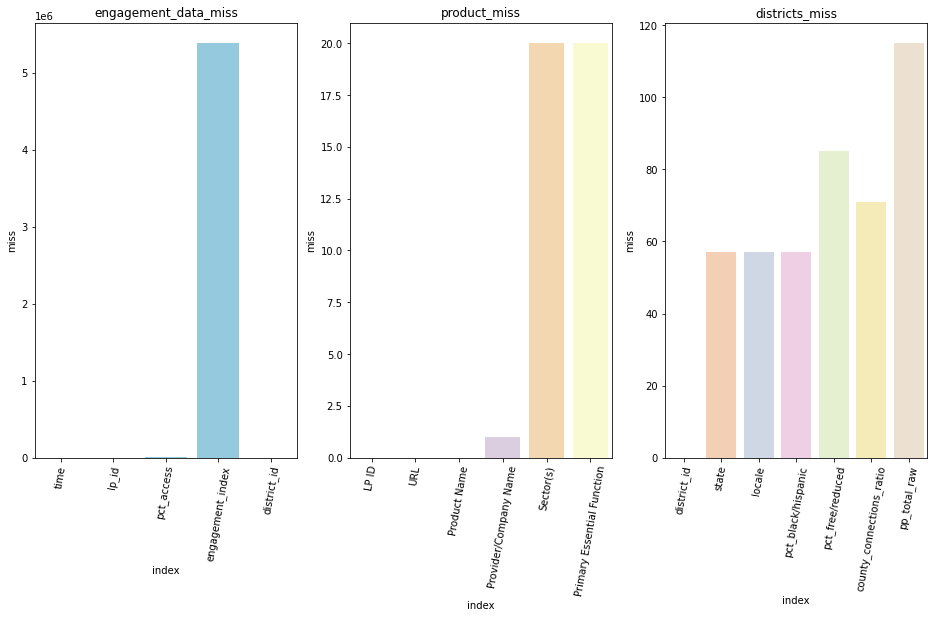

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,8))
#engagement
sns.barplot(x = 'index', y = 'miss', data = data_loss , color = 'skyblue', ax = ax1)
ax1.set_title("engagement_data_miss")
a1 = list(data_loss.columns)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=80)
#product
sns.barplot(x = 'index', y = 'miss', data = product_loss, palette = 'Pastel1', ax = ax2)
ax2.set_title("product_miss")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=80)
#district
sns.barplot(x = 'index', y = 'miss', data = districts_loss, palette = 'Pastel2', ax = ax3)
ax3.set_title( "districts_miss")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=80)

### Merge data 

In [7]:
product = product.rename({'LP ID':'lp_id'}, axis = 1) #change the key of product data
product['lp_id']  = product['lp_id'].astype('float')
final = data.merge(product, on = 'lp_id', how = 'inner')
final = final.merge(districts, on = 'district_id', how = 'left')
final.shape #the data shape after merge

(11691587, 16)

### Analysis 📈

<h4> 1.Records of each state and region </h4>
<br> top 10 of state and locale	</br>

In [8]:
state = final.groupby(["state", 'locale'])
state = state.size().reset_index(name='counts')
state.sort_values('counts', ascending = False).head(10)

,state,locale,counts
6,Connecticut,Suburb,998832
18,Massachusetts,Suburb,983037
10,Illinois,Suburb,964835
43,Utah,Suburb,756545
35,Ohio,Suburb,538060
1,California,City,433662
5,Connecticut,Rural,361095
22,Missouri,Suburb,339680
44,Utah,Town,302911
48,Washington,City,242403


plot all state and locale distribution

In [9]:
#state 
fig = px.sunburst(state, path = ['state'], values = 'counts',
                 color = 'counts',
                 color_continuous_scale='YlOrRd',
                 title = 'State')
fig.update_layout(
    margin = dict(t=40, l=10, r=10, b=10),
    title_font_color="blue"
)
fig.show()

#locale
fig = px.sunburst(state, path = ['locale'], values = 'counts',
                 color = 'counts',
                 color_continuous_scale='OrRd',
                 title = 'State_Locale')
fig.update_layout(
    margin = dict(t=40, l=10, r=10, b=10),
    title_font_color="blue"
)
fig.show()

#state_locale
fig = px.sunburst(state, path = ['state', 'locale'], values = 'counts',
                 color = 'counts',
                 color_continuous_scale='YlOrBr',
                 title = 'State_Locale')
fig.update_layout(
    margin = dict(t=40, l=10, r=10, b=10),
    title_font_color="blue"
)
fig.show()

<h4> 2.Records of each product and provider </h4>
<br> top 20 of product and provider	</br>

In [10]:
product_name = final.groupby('Product Name').size().reset_index(name = 'counts')
product_name = product_name.sort_values('counts', ascending=False)
product_name = product_name.head(20)

provider = final.groupby('Provider/Company Name').size().reset_index(name = 'counts')
provider = provider.sort_values('counts', ascending = False)
provider = provider.head(20)

provide = final.groupby(['Provider/Company Name', 'Product Name']).size().reset_index(name='counts')
provide = provide.sort_values('counts', ascending = False).head(20)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



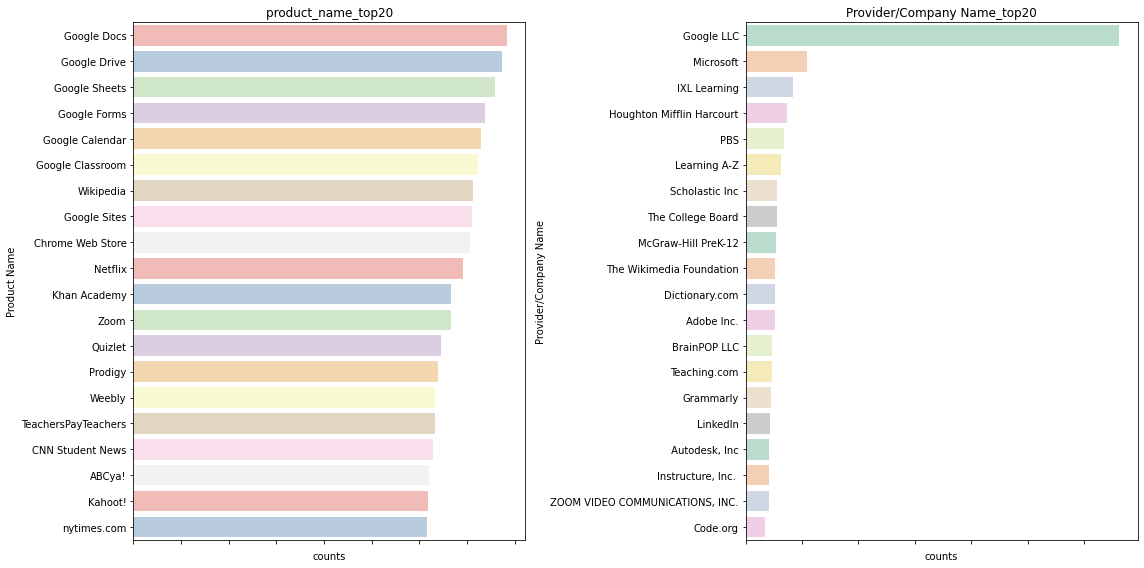

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
#product_name
sns.barplot(x = 'counts', y = 'Product Name', data = product_name , palette = 'Pastel1', ax = ax1)
ax1.set_title("product_name​_top20")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=80)
#product
sns.barplot(x = 'counts', y = 'Provider/Company Name', data = provider, palette = 'Pastel2', ax = ax2)
ax2.set_title("Provider/Company Name_top20")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=80)
fig.tight_layout() #子圖間距

fig = px.sunburst(provide, path = ['Provider/Company Name', 'Product Name'], values = 'counts',
                 color = 'counts',
                 color_continuous_scale='PuBuGn',
                 title = 'Provider_product_top20')
fig.update_layout(
    margin = dict(t=40, l=10, r=10, b=10)
)
fig.show()

<h4> 3.Records of each Primary Essential Function </h4>

In [12]:
final['class_main'] = final['Primary Essential Function'].str.split('-').str[0]
final['class_sub'] = final['Primary Essential Function'].str.split('-').str[1]

In [13]:
class_main = final.groupby(['class_main']).size().reset_index(name='counts')
class_sub = final.groupby(['class_sub']).size().reset_index(name='counts')
class_sub = class_sub.sort_values('counts', ascending = False)
class_ = final.groupby(['class_main', 'class_sub']).size().reset_index(name='counts')
class_ = class_.sort_values('counts', ascending = False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



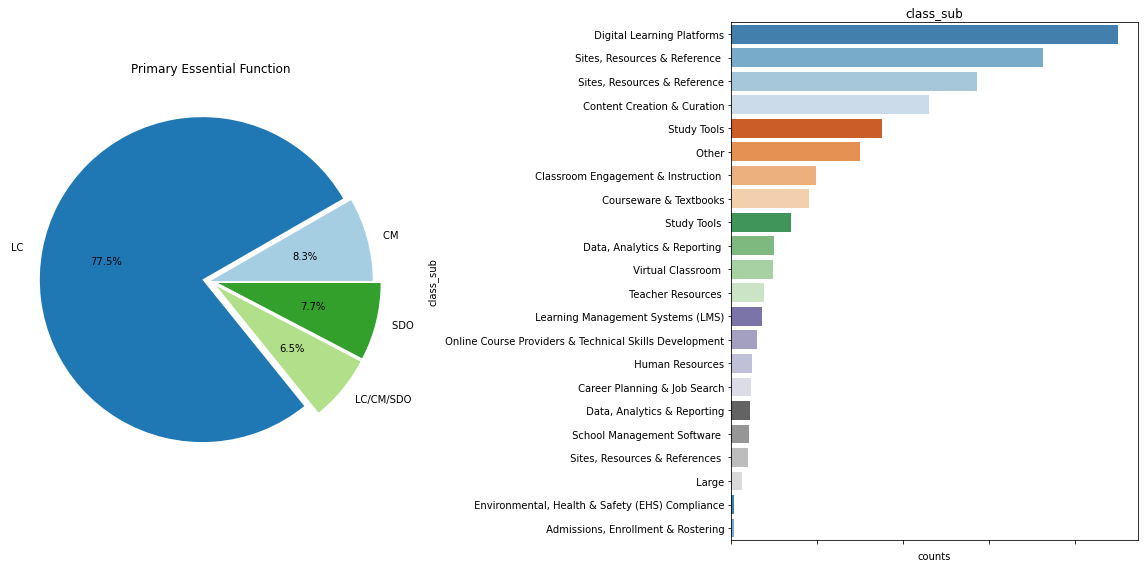

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
#cate
explode = (0, 0.05,0.05, 0.05)
ax1.pie('counts', labels = 'class_main', data = class_main,explode = explode, autopct = '%1.1f%%',colors = sns.color_palette("Paired"))
ax1.set_title('Primary Essential Function')

sns.barplot(y = 'class_sub', x = 'counts' , data = class_sub,
                palette =  sns.color_palette("tab20c"), ax = ax2)
ax2.set_title('class_sub')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
fig.tight_layout() #子圖間距

fig = px.sunburst(class_, path = ['class_main', 'class_sub'], values = 'counts',
                 color = 'counts',
                 color_continuous_scale='Blues',
                 title = 'class_top20')
fig.update_layout(
    margin = dict(t=40, l=10, r=10, b=10)
)
fig.show()

<h4> 4.Records of each Sector </h4>

In [15]:
#s1 : PreK-12 ; s2 : Higher Ed ; s3 : Corporate
s1 = s2 = s3 = 0
for s in final['Sector(s)']:
    if (not pd.isnull(s)):
        s_ = s.split(';')
        for i in range(len(s_)):
            sub = s_[i].strip()
            if(sub == "PreK-12"): s1 += 1
            if(sub == "Higher Ed"): s2 += 1
            if(sub == "Corporate"): s3 += 1
                
plt.figure(figsize=(12,8))
fig = px.pie(values=[s1, s2, s3], names = ["PreK-12", "Higher Ed", "Corporate"], 
             title='Sector(s)', hole=.3)
fig.show()

<Figure size 864x576 with 0 Axes>

<h4> 4.time series </h4>

In [16]:
final['time'] = pd.to_datetime(final['time'], format = '%Y-%m-%d')
final['pct_black/hispanic'] = final['pct_black/hispanic'].str.replace('[','')
final['pct_free/reduced'] = final['pct_free/reduced'].str.replace('[','')
final['county_connections_ratio'] = final['county_connections_ratio'].str.replace('[','')
final['pp_total_raw'] = final['pp_total_raw'].str.replace('[','')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular

Take the average of the percentage columns (pct_black/hispanic、pct_free/reduced、county_connections_ratio、pp_total_raw)

In [17]:
def pct_col(data, col):
    mean = []
    
    for i in data[col]:
        if(not pd.isnull(i)):
            upper = float(i.split(',')[1])
            lower = float(i.split(',')[0])
            mean_value = (upper+lower)/2
            mean.append(mean_value)
        else:
            mean.append(None)
            
    mean_col = col+'_mean'
    
    data[mean_col] = pd.to_numeric(mean)
    return data

In [18]:
pct_col(final, 'pct_black/hispanic')
pct_col(final, 'pct_free/reduced')
pct_col(final, 'county_connections_ratio')
pct_col(final, 'pp_total_raw')

,time,lp_id,pct_access,engagement_index,district_id,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,...,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw,class_main,class_sub,pct_black/hispanic_mean,pct_free/reduced_mean,county_connections_ratio_mean,pp_total_raw_mean
0,2020-01-01,92844.0,0.01,0.68,6345,https://www.typing.com/,Typing.com,Teaching.com,PreK-12; Higher Ed; Corporate,LC - Digital Learning Platforms,...,"0.2, 0.4",NaN,"0.18, 1","12000, 14000",LC,Digital Learning Platforms,0.3,NaN,0.59,13000.0
1,2020-01-02,92844.0,0.09,6.58,6345,https://www.typing.com/,Typing.com,Teaching.com,PreK-12; Higher Ed; Corporate,LC - Digital Learning Platforms,...,"0.2, 0.4",NaN,"0.18, 1","12000, 14000",LC,Digital Learning Platforms,0.3,NaN,0.59,13000.0
2,2020-01-03,92844.0,0.06,3.63,6345,https://www.typing.com/,Typing.com,Teaching.com,PreK-12; Higher Ed; Corporate,LC - Digital Learning Platforms,...,"0.2, 0.4",NaN,"0.18, 1","12000, 14000",LC,Digital Learning Platforms,0.3,NaN,0.59,13000.0
3,2020-01-06,92844.0,0.22,9.87,6345,https://www.typing.com/,Typing.com,Teaching.com,PreK-12; Higher Ed; Corporate,LC - Digital Learning Platforms,...,"0.2, 0.4",NaN,"0.18, 1","12000, 14000",LC,Digital Learning Platforms,0.3,NaN,0.59,13000.0
4,2020-01-07,92844.0,0.16,15.08,6345,https://www.typing.com/,Typing.com,Teaching.com,PreK-12; Higher Ed; Corporate,LC - Digital Learning Platforms,...,"0.2, 0.4",NaN,"0.18, 1","12000, 14000",LC,Digital Learning Platforms,0.3,NaN,0.59,13000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11691582,2020-12-16,43149.0,0.02,0.58,6640,http://contentkeeper.com/,ContentKeeper,ContentKeeper Technologies,PreK-12; Higher Ed; Corporate,SDO - School Management Software - Mobile Devi...,...,"0, 0.2",NaN,"0.18, 1","8000, 10000",SDO,School Management Software,0.1,NaN,0.59,9000.0
11691583,2020-12-17,43149.0,0.02,0.70,6640,http://contentkeeper.com/,ContentKeeper,ContentKeeper Technologies,PreK-12; Higher Ed; Corporate,SDO - School Management Software - Mobile Devi...,...,"0, 0.2",NaN,"0.18, 1","8000, 10000",SDO,School Management Software,0.1,NaN,0.59,9000.0
11691584,2020-12-18,43149.0,0.02,0.82,6640,http://contentkeeper.com/,ContentKeeper,ContentKeeper Technologies,PreK-12; Higher Ed; Corporate,SDO - School Management Software - Mobile Devi...,...,"0, 0.2",NaN,"0.18, 1","8000, 10000",SDO,School Management Software,0.1,NaN,0.59,9000.0
11691585,2020-12-21,43149.0,0.01,0.29,6640,http://contentkeeper.com/,ContentKeeper,ContentKeeper Technologies,PreK-12; Higher Ed; Corporate,SDO - School Management Software - Mobile Devi...,...,"0, 0.2",NaN,"0.18, 1","8000, 10000",SDO,School Management Software,0.1,NaN,0.59,9000.0


In [19]:
final['pct_black/hispanic_mean'] = final['pct_black/hispanic_mean'].fillna(0)
final['pct_free/reduced_mean'] = final['pct_free/reduced_mean'].fillna(0)
final['county_connections_ratio_mean'] = final['county_connections_ratio_mean'].fillna(0)
final['pp_total_raw_mean'] = final['pp_total_raw_mean'].fillna(0)

In [20]:
state_ = final.groupby("state").size().reset_index(name='counts')
state_.sort_values('counts', ascending = False).head(5)

,state,counts
2,Connecticut,1520577
19,Utah,1278833
5,Illinois,1172850
7,Massachusetts,1142106
1,California,673542


In [21]:
def plot_pct(state_name):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16,8))
    fig.suptitle(state_name + '_percentage')

    sns.lineplot(data = final[final['state'] == state_name], x = "time", y = "pct_black/hispanic_mean", ax = ax1).set_title('pct_black/hispanic_mean')
    sns.lineplot(data = final[final['state'] == state_name], x = "time", y = "pct_free/reduced_mean", ax = ax2).set_title('pct_free/reduced_mean')
    sns.lineplot(data = final[final['state'] == state_name], x = "time", y = "county_connections_ratio_mean", ax = ax3).set_title('county_connections_ratio_mean')
    sns.lineplot(data = final[final['state'] == state_name], x = "time", y = "pp_total_raw_mean", ax = ax4).set_title('pp_total_raw_mean')
    plt.title('subtitle2')
    fig.tight_layout()

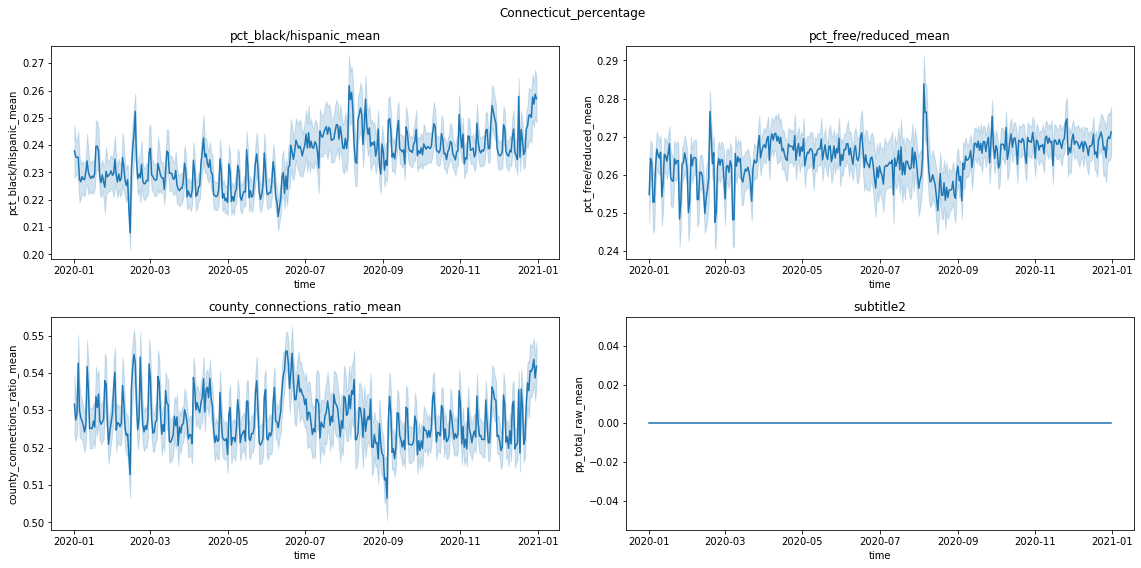

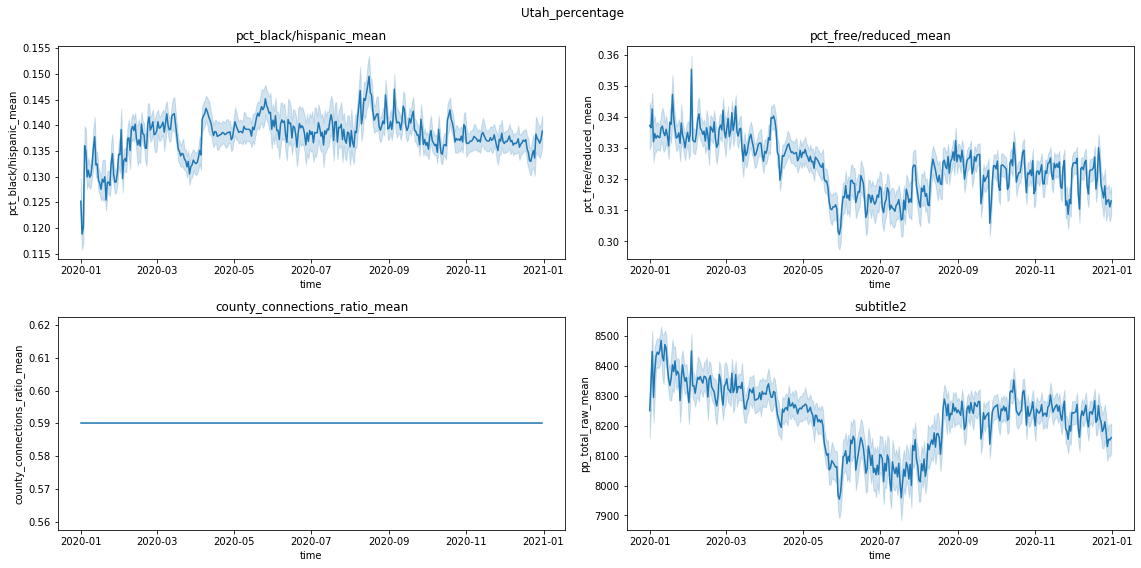

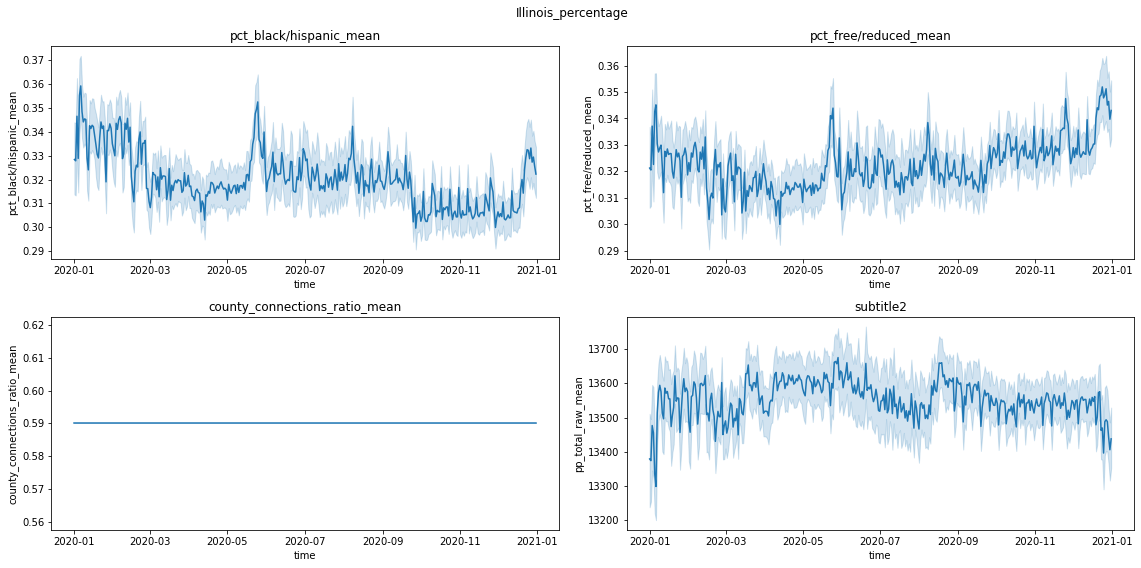

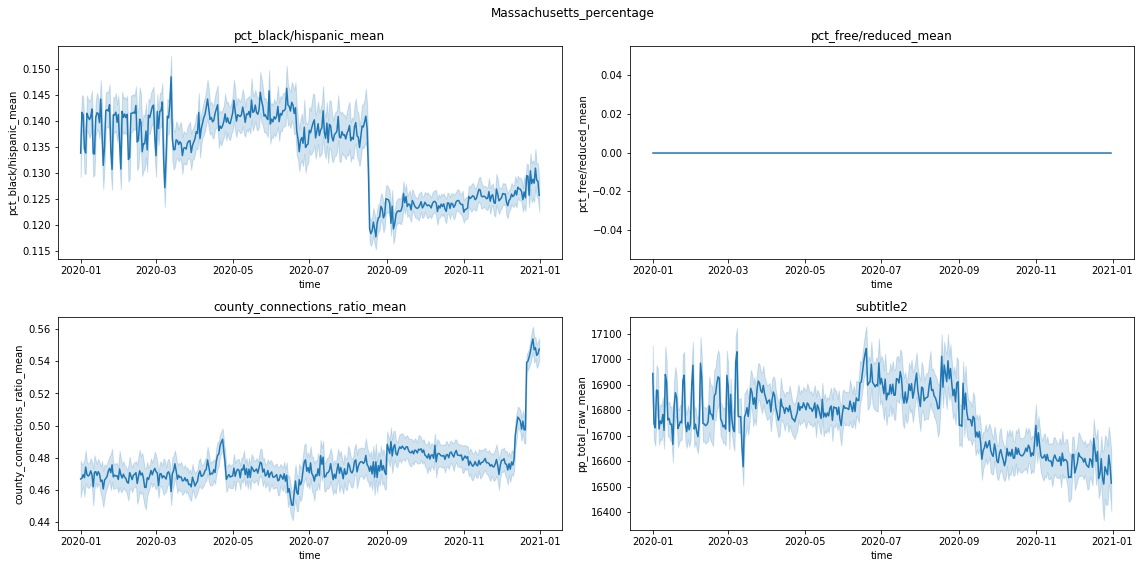

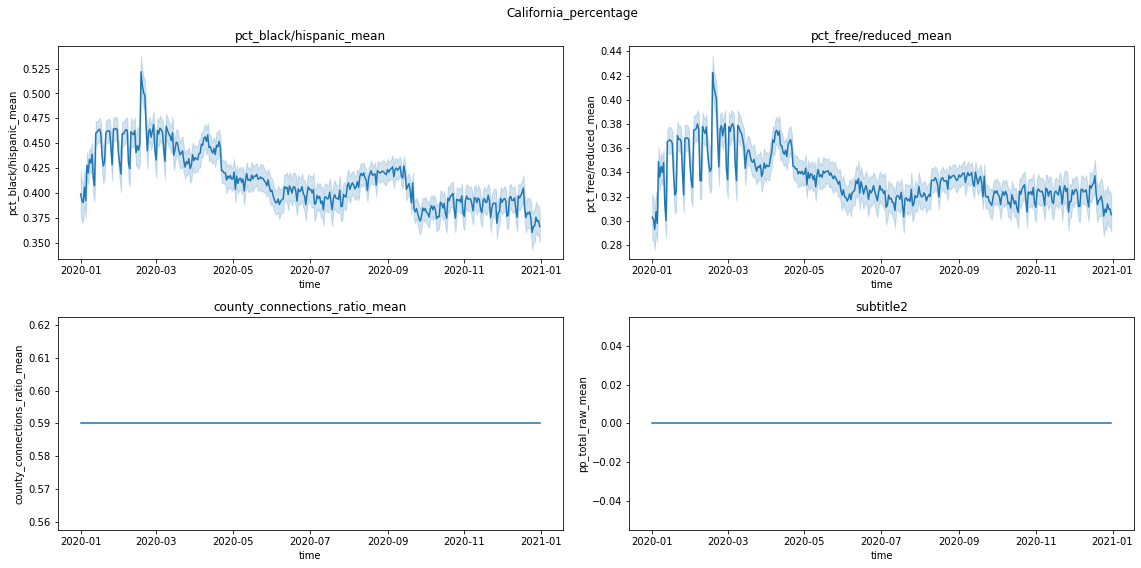

In [22]:
plot_pct('Connecticut')
plot_pct('Utah')
plot_pct('Illinois')
plot_pct('Massachusetts')
plot_pct('California')

plot time series of pct_access and engagement_index

In [23]:
def plot_timeseries(data, col1, col2, col3):
    max_list = data[[col1,col2]]\
        .groupby([col1])[col2].mean()\
        .sort_values(ascending=False).index[:5].tolist()

    data = data[data[col1].isin(max_list)]\
                    .reset_index(drop=True)[[col3, col1, col2]]
    data = data.pivot_table(index=col3, columns=col1, values=col2)

    fig = px.line(data, facet_col=col1, facet_col_wrap=1, width=800, height=800)
    fig.update_layout(
                      title = (col1 + "_" + col2 + "  Time Series").title(),
                      title_x = 0.4,
                      template="plotly_white",
                      paper_bgcolor='#f5f7f8'
                    )
    fig.add_vline(x = "2020-01-11", line_width=3, line_dash="dash", line_color="black")
    fig.add_vrect(x0 = "2020-07-01", x1="2020-08-31", fillcolor = 'red', opacity=0.2)
    fig.show()

top 5 state

In [24]:
plot_timeseries(final,"state","pct_access","time")
plot_timeseries(final,"state","engagement_index","time")

locale

In [25]:
plot_timeseries(final,"locale","pct_access","time")
plot_timeseries(final,"locale","engagement_index","time")